In [1]:
import sys
import os
import argparse

# 添加项目路径
sys.path.append('/Users/haha/Story')  # 你的项目根目录

# 导入所有必要模块
from src.constant import output_dir
from src.utils.utils import save_md, save_json, load_json, extract_plot_list
from src.generation.outline_generator import generate_outline
from src.generation.chapter_reorder import reorder_chapters
from src.generation.generate_characters import generate_characters_v1
from src.generation.expand_story import expand_story_v1
from src.compile_story import compile_full_story_by_sentence, compile_full_story_by_chapter
from src.enhance_story import enhance_story_with_transitions, polish_dialogues_in_story
from src.generation.dialogue_inserter import analyze_dialogue_insertions, run_dialogue_insertion, analyze_dialogue_insertions_v2
from src.utils.utils import extract_behavior_llm, convert_dialogue_dict_to_list
from src.sync.plot_sync_manager import sync_plot_and_dialogue_from_behavior
from src.sync.auto_propagate_plot_update import auto_propagate_plot_update
from src.analysis.character_state_tracker import run_character_state_tracker
from src.utils.logger import append_log, build_log_record, build_simple_log, init_log_path
from src.version_namer import build_version_name 

print("✅ 所有模块导入成功")

#

✅ 所有模块导入成功


✅ 导入完成
📊 分析结果概览:
总章节数: 7
主要方法: VADER
验证方法: LabMT-en-v1
相关系数: 0.350
📖 故事文件总长度: 236128

前500字符预览:
# Chapter 1: The Beginning of the Interstellar Mission

In the early morning, Little Red Riding Hood, dressed in her red smart uniform and carrying a sealed medical pod on her back, walked determinedly into the main hall of the spaceport.

Dr. Lin was already waiting by the service desk, his gaze filled with concern as he handed over the final authorization documents.

The two conversed quietly, with Dr. Lin instructing Little Red Riding Hood to be careful on her journey, especially warning her 
🚀 初始化主次法情感分析器...
📋 选择LabMT版本: v1 (与Reagan原文一致)
📥 下载VADER词典...
✅ VADER分析器初始化成功（主要方法）
📁 发现本地LabMT词典文件


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


✅ LabMT词典加载成功，有效词汇: 3634
✅ 双方法分析器准备就绪
✅ 解析到 7 个章节
✅ 解析到 7 个章节

📋 各章节概览:

第1章: The Beginning of the Interstellar Mission
  长度: 6565 字符
  前100字符: In the early morning, Little Red Riding Hood, dressed in her red smart uniform and carrying a sealed...

第2章: Space Traversal
  长度: 12154 字符
  前100字符: Little Red Riding Hood piloted the Red Star spacecraft, carrying her ailing grandmother and medical ...

第3章: Encounter with Mechanical Wolves
  长度: 21547 字符
  前100字符: Little Red Riding Hood piloted her hover board, cautiously weaving through the twilight forest, prep...

第4章: Grandmother Under Hacker Attack
  长度: 53874 字符
  前100字符: As night fell, grandmother rested quietly against her medical bed, with medical robot Xiao Bai caref...

第5章: Intelligent Assistance Counterattack
  长度: 47045 字符
  前100字符: Under the night sky, grandmother's intelligent medical cabin was invaded by unknown hacker forces, w...

第6章: Safe Chip Delivery
  长度: 50601 字符
  前100字符: Night fell, interstellar courier Little Red 

/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_12909/2141686008.py:254: UserWarning: Glyph 31456 (\N{CJK UNIFIED IDEOGRAPH-7AE0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_12909/2141686008.py:254: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_12909/2141686008.py:254: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_12909/2141686008.py:254: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_12909/2141686008.py:254: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s3

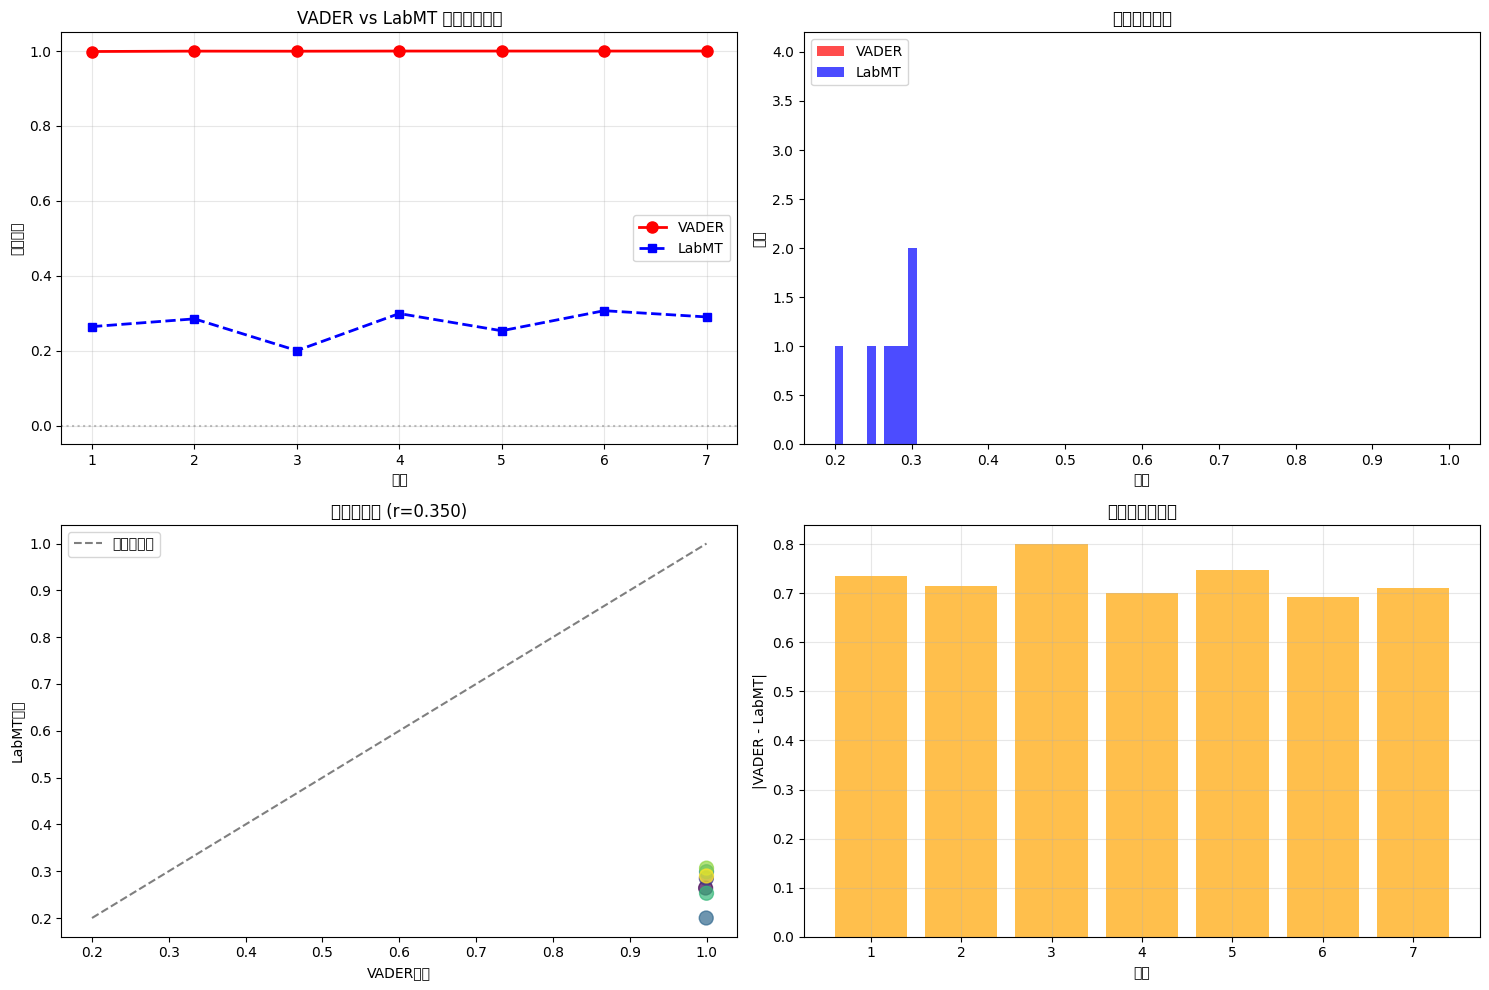


🔍 问题诊断报告:
🚨 VADER异常高分问题:
  - 所有章节分数都>0.8，这在真实故事中很少见
  - 可能原因：文本预处理问题、特殊字符、或VADER不适合此类文本

⚠️ 方法一致性偏低 (r=0.350):
  - 两种方法给出的结果差异较大
  - 可能需要进一步分析文本特征

📊 LabMT词汇覆盖率: 0.173
  - 覆盖率较低，可能影响LabMT分析准确性

💡 改进建议:
1. 检查文本预处理：移除特殊字符、HTML标签等
2. 分析VADER异常高分的具体原因
3. 考虑使用其他情感分析方法进行验证
4. 检查story文件的原始格式是否有问题

🎯 下一步建议:
1. 仔细查看VADER异常高分的具体章节内容
2. 检查原始story文件是否有格式问题
3. 考虑使用不同的文本预处理方法
4. 尝试其他情感分析工具进行对比验证


In [3]:
# 情感弧线深度分析 - Jupyter Notebook
# 逐步探查VADER和LabMT分析结果

# =============================================================================
# Cell 1: 导入和设置
# =============================================================================


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from src.analysis.emotional_arc_analyzer import DualMethodEmotionalAnalyzer, analyze_story_dual_method

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 导入完成")

# =============================================================================
# Cell 2: 加载分析结果
# =============================================================================
# 加载之前的分析结果
result_file = '/Users/haha/Story/output/dual_method_analysis_20250813_002204.json'  # 替换为你的实际文件名

with open(result_file, 'r', encoding='utf-8') as f:
    result = json.load(f)

print("📊 分析结果概览:")
print(f"总章节数: {result['metadata']['total_chapters']}")
print(f"主要方法: {result['metadata']['primary_method']}")
print(f"验证方法: {result['metadata']['validation_method']}")
print(f"相关系数: {result['correlation_analysis']['pearson_correlation']['r']:.3f}")

# =============================================================================
# Cell 3: 查看原始文本内容
# =============================================================================
# 重新读取故事文件查看具体内容
story_file = '/Users/haha/Story/data/output/小红帽_科幻_linear_T0.7_s1/enhance.md'

with open(story_file, 'r', encoding='utf-8') as f:
    story_content = f.read()

print("📖 故事文件总长度:", len(story_content))
print("\n" + "="*60)
print("前500字符预览:")
print("="*60)
print(story_content[:500])
print("="*60)

# =============================================================================
# Cell 4: 重新解析章节内容
# =============================================================================
# 重新解析章节，看看具体分解
analyzer = DualMethodEmotionalAnalyzer(labmt_version='v1')
chapters = analyzer.parse_story(story_content)

print(f"✅ 解析到 {len(chapters)} 个章节")
print("\n📋 各章节概览:")

for i, chapter in enumerate(chapters):
    print(f"\n第{chapter['chapter_num']}章: {chapter['title']}")
    print(f"  长度: {len(chapter['content'])} 字符")
    print(f"  前100字符: {chapter['content'][:100]}...")

# =============================================================================
# Cell 5: 逐章分析VADER分数
# =============================================================================
print("🔍 VADER逐章详细分析:")
print("="*80)

vader_details = []

for i, chapter in enumerate(chapters):
    # VADER详细分析
    scores = analyzer.vader_analyzer.polarity_scores(chapter['content'])
    
    chapter_detail = {
        'chapter_num': chapter['chapter_num'],
        'title': chapter['title'],
        'content_length': len(chapter['content']),
        'vader_compound': scores['compound'],
        'vader_pos': scores['pos'], 
        'vader_neu': scores['neu'],
        'vader_neg': scores['neg'],
        'content_preview': chapter['content'][:200]
    }
    
    vader_details.append(chapter_detail)
    
    print(f"\n第{chapter['chapter_num']}章: {chapter['title']}")
    print(f"  复合分数: {scores['compound']:.4f}")
    print(f"  正面: {scores['pos']:.3f}, 中性: {scores['neu']:.3f}, 负面: {scores['neg']:.3f}")
    print(f"  内容预览: {chapter['content'][:150]}...")

# =============================================================================
# Cell 6: 分析VADER异常高分的原因
# =============================================================================
print("\n🚨 VADER异常分析:")
print("="*60)

# 找出分数特别高的章节
high_score_chapters = [ch for ch in vader_details if ch['vader_compound'] > 0.9]

print(f"发现 {len(high_score_chapters)} 个异常高分章节 (>0.9)")

for ch in high_score_chapters:
    print(f"\n📖 第{ch['chapter_num']}章分析:")
    print(f"  复合分数: {ch['vader_compound']:.4f}")
    
    # 分析具体文本
    content = ch['content_preview']
    
    # 查找可能导致高分的词汇
    positive_words = []
    negative_words = []
    
    # 简单的关键词检测
    words = content.lower().split()
    for word in words:
        if word in ['good', 'great', 'excellent', 'wonderful', 'amazing', 'perfect', 'love', 'happy', 'success']:
            positive_words.append(word)
        elif word in ['bad', 'terrible', 'awful', 'hate', 'sad', 'angry', 'death', 'kill', 'fear']:
            negative_words.append(word)
    
    print(f"  发现正面词: {positive_words}")
    print(f"  发现负面词: {negative_words}")
    
    # 句子级别分析
    sentences = content.split('.')[:3]  # 前3句
    print(f"  句子分析:")
    for j, sentence in enumerate(sentences):
        if sentence.strip():
            sent_score = analyzer.vader_analyzer.polarity_scores(sentence.strip())
            print(f"    句{j+1}: {sent_score['compound']:.3f} - {sentence.strip()[:80]}...")

# =============================================================================
# Cell 7: LabMT分数分析
# =============================================================================
print("\n🔍 LabMT逐章详细分析:")
print("="*80)

labmt_details = []

for i, chapter in enumerate(chapters):
    # LabMT分析
    labmt_score = analyzer.analyze_labmt(chapter['content'])
    
    # 统计词汇
    words = chapter['content'].lower().split()
    labmt_words = [w for w in words if w in analyzer.labmt_dict]
    
    chapter_detail = {
        'chapter_num': chapter['chapter_num'],
        'title': chapter['title'],
        'labmt_score': labmt_score,
        'total_words': len(words),
        'labmt_words': len(labmt_words),
        'labmt_coverage': len(labmt_words) / max(len(words), 1),
        'content_preview': chapter['content'][:200]
    }
    
    labmt_details.append(chapter_detail)
    
    print(f"\n第{chapter['chapter_num']}章: {chapter['title']}")
    print(f"  LabMT分数: {labmt_score:.4f}")
    print(f"  词汇覆盖: {len(labmt_words)}/{len(words)} ({len(labmt_words)/max(len(words), 1)*100:.1f}%)")
    
    # 显示识别的情感词汇
    scored_words = [(w, analyzer.labmt_dict[w]) for w in labmt_words]
    if scored_words:
        # 按分数排序
        scored_words.sort(key=lambda x: x[1])
        top_negative = scored_words[:3]  # 最负面的3个
        top_positive = scored_words[-3:]  # 最正面的3个
        
        print(f"  最负面词汇: {top_negative}")
        print(f"  最正面词汇: {top_positive}")

# =============================================================================
# Cell 8: 对比两种方法的差异
# =============================================================================
# 创建对比DataFrame
comparison_df = pd.DataFrame({
    'Chapter': [f"Ch{i+1}" for i in range(len(chapters))],
    'Title': [ch['title'][:20] + '...' for ch in chapters],
    'VADER': [ch['vader_compound'] for ch in vader_details],
    'LabMT': [ch['labmt_score'] for ch in labmt_details],
    'Difference': [abs(v['vader_compound'] - l['labmt_score']) for v, l in zip(vader_details, labmt_details)]
})

print("\n📊 双方法对比表:")
print(comparison_df.round(3))

# 分析差异
max_diff_idx = comparison_df['Difference'].idxmax()
print(f"\n🔍 差异最大的章节: {comparison_df.iloc[max_diff_idx]['Chapter']}")
print(f"  VADER: {comparison_df.iloc[max_diff_idx]['VADER']:.3f}")
print(f"  LabMT: {comparison_df.iloc[max_diff_idx]['LabMT']:.3f}")
print(f"  差异: {comparison_df.iloc[max_diff_idx]['Difference']:.3f}")

# =============================================================================
# Cell 9: 可视化分析
# =============================================================================
# 创建详细的对比图
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. 双方法对比线图
chapters_num = range(1, len(chapters) + 1)
ax1.plot(chapters_num, [ch['vader_compound'] for ch in vader_details], 
         'o-', label='VADER', linewidth=2, markersize=8, color='red')
ax1.plot(chapters_num, [ch['labmt_score'] for ch in labmt_details], 
         's--', label='LabMT', linewidth=2, markersize=6, color='blue')
ax1.set_title('VADER vs LabMT 情感分数对比')
ax1.set_xlabel('章节')
ax1.set_ylabel('情感分数')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='gray', linestyle=':', alpha=0.5)

# 2. 分数分布直方图
ax2.hist([ch['vader_compound'] for ch in vader_details], alpha=0.7, label='VADER', bins=10, color='red')
ax2.hist([ch['labmt_score'] for ch in labmt_details], alpha=0.7, label='LabMT', bins=10, color='blue')
ax2.set_title('情感分数分布')
ax2.set_xlabel('分数')
ax2.set_ylabel('频次')
ax2.legend()

# 3. 散点图 - 相关性分析
ax3.scatter([ch['vader_compound'] for ch in vader_details], 
           [ch['labmt_score'] for ch in labmt_details],
           c=chapters_num, cmap='viridis', s=100, alpha=0.7)
ax3.set_xlabel('VADER分数')
ax3.set_ylabel('LabMT分数')
ax3.set_title(f'方法相关性 (r={result["correlation_analysis"]["pearson_correlation"]["r"]:.3f})')

# 添加对角线
min_val = min(min([ch['vader_compound'] for ch in vader_details]), 
              min([ch['labmt_score'] for ch in labmt_details]))
max_val = max(max([ch['vader_compound'] for ch in vader_details]), 
              max([ch['labmt_score'] for ch in labmt_details]))
ax3.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='完全一致线')
ax3.legend()

# 4. 差异分析
differences = [abs(v['vader_compound'] - l['labmt_score']) for v, l in zip(vader_details, labmt_details)]
ax4.bar(chapters_num, differences, color='orange', alpha=0.7)
ax4.set_title('各章节分数差异')
ax4.set_xlabel('章节')
ax4.set_ylabel('|VADER - LabMT|')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# Cell 10: 问题诊断和建议
# =============================================================================
print("\n🔍 问题诊断报告:")
print("="*60)

# 1. VADER异常高分问题
vader_scores = [ch['vader_compound'] for ch in vader_details]
if all(score > 0.8 for score in vader_scores):
    print("🚨 VADER异常高分问题:")
    print("  - 所有章节分数都>0.8，这在真实故事中很少见")
    print("  - 可能原因：文本预处理问题、特殊字符、或VADER不适合此类文本")

# 2. 相关性分析
correlation = result['correlation_analysis']['pearson_correlation']['r']
if correlation < 0.5:
    print(f"\n⚠️ 方法一致性偏低 (r={correlation:.3f}):")
    print("  - 两种方法给出的结果差异较大")
    print("  - 可能需要进一步分析文本特征")

# 3. LabMT词汇覆盖率
avg_coverage = np.mean([ch['labmt_coverage'] for ch in labmt_details])
print(f"\n📊 LabMT词汇覆盖率: {avg_coverage:.3f}")
if avg_coverage < 0.3:
    print("  - 覆盖率较低，可能影响LabMT分析准确性")

# 建议
print(f"\n💡 改进建议:")
print("1. 检查文本预处理：移除特殊字符、HTML标签等")
print("2. 分析VADER异常高分的具体原因")
print("3. 考虑使用其他情感分析方法进行验证")
print("4. 检查story文件的原始格式是否有问题")

# =============================================================================
# Cell 11: 导出分析数据
# =============================================================================
# 保存详细分析结果
detailed_analysis = {
    'vader_details': vader_details,
    'labmt_details': labmt_details,
    'comparison_df': comparison_df.to_dict(),
    'correlation': correlation,
    'avg_labmt_coverage': avg_coverage,
    'diagnosis': {
        'vader_high_scores': all(score > 0.8 for score in vader_scores),
        'low_correlation': correlation < 0.5,
        'low_labmt_coverage': avg_coverage < 0.3
    }
}


print("\n🎯 下一步建议:")
print("1. 仔细查看VADER异常高分的具体章节内容")
print("2. 检查原始story文件是否有格式问题")
print("3. 考虑使用不同的文本预处理方法")
print("4. 尝试其他情感分析工具进行对比验证")

In [4]:
# =============================================================================
# Cell 5: 逐章分析VADER分数
# =============================================================================
print("🔍 VADER逐章详细分析:")
print("="*80)

vader_details = []

for i, chapter in enumerate(chapters):
    # VADER详细分析
    scores = analyzer.vader_analyzer.polarity_scores(chapter['content'])
    
    chapter_detail = {
        'chapter_num': chapter['chapter_num'],
        'title': chapter['title'],
        'content_length': len(chapter['content']),
        'vader_compound': scores['compound'],
        'vader_pos': scores['pos'], 
        'vader_neu': scores['neu'],
        'vader_neg': scores['neg'],
        'content_preview': chapter['content'][:200]
    }
    
    vader_details.append(chapter_detail)
    
    print(f"\n第{chapter['chapter_num']}章: {chapter['title']}")
    print(f"  复合分数: {scores['compound']:.4f}")
    print(f"  正面: {scores['pos']:.3f}, 中性: {scores['neu']:.3f}, 负面: {scores['neg']:.3f}")
    print(f"  内容预览: {chapter['content'][:150]}...")

# =============================================================================
# Cell 6: 分析VADER异常高分的原因
# =============================================================================
print("\n🚨 VADER异常分析:")
print("="*60)

# 找出分数特别高的章节
high_score_chapters = [ch for ch in vader_details if ch['vader_compound'] > 0.9]

print(f"发现 {len(high_score_chapters)} 个异常高分章节 (>0.9)")

for ch in high_score_chapters:
    print(f"\n📖 第{ch['chapter_num']}章分析:")
    print(f"  复合分数: {ch['vader_compound']:.4f}")
    
    # 分析具体文本
    content = ch['content_preview']
    
    # 查找可能导致高分的词汇
    positive_words = []
    negative_words = []
    
    # 简单的关键词检测
    words = content.lower().split()
    for word in words:
        if word in ['good', 'great', 'excellent', 'wonderful', 'amazing', 'perfect', 'love', 'happy', 'success']:
            positive_words.append(word)
        elif word in ['bad', 'terrible', 'awful', 'hate', 'sad', 'angry', 'death', 'kill', 'fear']:
            negative_words.append(word)
    
    print(f"  发现正面词: {positive_words}")
    print(f"  发现负面词: {negative_words}")
    
    # 句子级别分析
    sentences = content.split('.')[:3]  # 前3句
    print(f"  句子分析:")
    for j, sentence in enumerate(sentences):
        if sentence.strip():
            sent_score = analyzer.vader_analyzer.polarity_scores(sentence.strip())
            print(f"    句{j+1}: {sent_score['compound']:.3f} - {sentence.strip()[:80]}...")


🔍 VADER逐章详细分析:

第1章: The Beginning of the Interstellar Mission
  复合分数: 0.9988
  正面: 0.154, 中性: 0.805, 负面: 0.041
  内容预览: In the early morning, Little Red Riding Hood, dressed in her red smart uniform and carrying a sealed medical pod on her back, walked determinedly into...

第2章: Space Traversal
  复合分数: 0.9998
  正面: 0.191, 中性: 0.736, 负面: 0.073
  内容预览: Little Red Riding Hood piloted the Red Star spacecraft, carrying her ailing grandmother and medical robot Xiao Bai, traveling through the deep blue sp...

第3章: Encounter with Mechanical Wolves
  复合分数: 0.9996
  正面: 0.136, 中性: 0.782, 负面: 0.082
  内容预览: Little Red Riding Hood piloted her hover board, cautiously weaving through the twilight forest, preparing to accelerate toward grandmother's residence...

第4章: Grandmother Under Hacker Attack
  复合分数: 1.0000
  正面: 0.219, 中性: 0.714, 负面: 0.067
  内容预览: As night fell, grandmother rested quietly against her medical bed, with medical robot Xiao Bai carefully checking her vital signs nearby.

Suddenly,

In [5]:
# 测试1: 检查文本长度和VADER行为
print("🔍 VADER异常诊断测试:")
print("="*60)

for i, chapter in enumerate(chapters[:2]):  # 只测试前2章
    content = chapter['content']
    print(f"\n第{i+1}章: {chapter['title']}")
    print(f"文本长度: {len(content)} 字符")
    
    # 测试完整文本
    full_score = analyzer.vader_analyzer.polarity_scores(content)
    print(f"完整文本分数: {full_score}")
    
    # 测试前100字符
    short_content = content[:100]
    short_score = analyzer.vader_analyzer.polarity_scores(short_content)
    print(f"前100字符分数: {short_score}")
    
    # 测试分段处理
    sentences = content.split('.')[:5]  # 前5句
    sentence_scores = []
    for j, sent in enumerate(sentences):
        if sent.strip():
            sent_score = analyzer.vader_analyzer.polarity_scores(sent.strip())
            sentence_scores.append(sent_score['compound'])
            print(f"  句{j+1}: {sent_score['compound']:.3f}")
    
    # 手动计算平均分
    avg_sentence_score = sum(sentence_scores) / len(sentence_scores) if sentence_scores else 0
    print(f"句子平均分: {avg_sentence_score:.3f}")
    print(f"vs 整体分数: {full_score['compound']:.3f}")
    print(f"差异: {abs(full_score['compound'] - avg_sentence_score):.3f}")

🔍 VADER异常诊断测试:

第1章: The Beginning of the Interstellar Mission
文本长度: 6565 字符
完整文本分数: {'neg': 0.041, 'neu': 0.805, 'pos': 0.154, 'compound': 0.9988}
前100字符分数: {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}
  句1: 0.402
  句2: 0.000
  句3: 0.000
  句4: 0.000
  句5: -0.612
句子平均分: -0.042
vs 整体分数: 0.999
差异: 1.041

第2章: Space Traversal
文本长度: 12154 字符
完整文本分数: {'neg': 0.073, 'neu': 0.736, 'pos': 0.191, 'compound': 0.9998}
前100字符分数: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
  句1: 0.000
  句2: 0.000
  句3: 0.867
  句4: 0.128
  句5: 0.296
句子平均分: 0.258
vs 整体分数: 1.000
差异: 0.742


In [6]:
# 测试现代情感分析模型
from transformers import pipeline

# 初始化现代模型（处理长文本更好）
def init_modern_sentiment():
    try:
        # 选项1：RoBERTa (推荐)
        classifier = pipeline(
            "sentiment-analysis", 
            model="cardiffnlp/twitter-roberta-base-sentiment-latest",
            truncation=True,
            max_length=512
        )
        return classifier, 'roberta'
    except:
        try:
            # 选项2：DistilBERT (备选)
            classifier = pipeline(
                "sentiment-analysis",
                model="distilbert-base-uncased-finetuned-sst-2-english",
                truncation=True,
                max_length=512
            )
            return classifier, 'distilbert'
        except:
            return None, 'none'

def analyze_with_modern_model(classifier, text, model_type):
    """使用现代模型分析长文本"""
    if len(text) <= 512:
        # 短文本直接分析
        result = classifier(text)[0]
        score = result['score'] if result['label'] in ['POSITIVE', 'POS'] else -result['score']
        return score
    else:
        # 长文本分段分析（但保持语义）
        sentences = text.split('. ')
        scores = []
        
        for sentence in sentences:
            if len(sentence.strip()) > 10:
                try:
                    result = classifier(sentence.strip())[0]
                    score = result['score'] if result['label'] in ['POSITIVE', 'POS'] else -result['score']
                    scores.append(score)
                except:
                    continue
        
        return sum(scores) / len(scores) if scores else 0.0

# 测试现代模型
print("🔬 测试现代情感分析模型:")
modern_classifier, model_type = init_modern_sentiment()

if modern_classifier:
    print(f"✅ 成功加载: {model_type}")
    
    # 重新分析前3章
    for i, chapter in enumerate(chapters[:3]):
        labmt_score = labmt_details[i]['labmt_score']
        modern_score = analyze_with_modern_model(modern_classifier, chapter['content'], model_type)
        
        print(f"第{i+1}章:")
        print(f"  LabMT: {labmt_score:.3f}")
        print(f"  {model_type}: {modern_score:.3f}")
        print()
else:
    print("❌ 无法加载现代模型，建议使用LabMT作为主要方法")

🔬 测试现代情感分析模型:


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use mps:0


✅ 成功加载: roberta
第1章:
  LabMT: 0.264
  roberta: -0.746

第2章:
  LabMT: 0.285
  roberta: -0.746

第3章:
  LabMT: 0.200
  roberta: -0.720



In [7]:
# 调试RoBERTa的具体输出
print("🔍 调试RoBERTa模型输出:")
print("="*60)

# 测试第1章的具体分析
test_text = chapters[0]['content'][:200]  # 前200字符
print(f"测试文本: {test_text}")
print()

# 查看原始输出
raw_result = modern_classifier(test_text)
print(f"RoBERTa原始输出: {raw_result}")

# 测试简单文本
simple_positive = "I love this amazing story!"
simple_negative = "This is terrible and awful."

pos_result = modern_classifier(simple_positive)
neg_result = modern_classifier(simple_negative)

print(f"\n测试正面文本: '{simple_positive}'")
print(f"RoBERTa输出: {pos_result}")

print(f"\n测试负面文本: '{simple_negative}'")
print(f"RoBERTa输出: {neg_result}")

# 分析第1章的句子
print(f"\n分析第1章前5句:")
sentences = chapters[0]['content'].split('.')[:5]
for i, sentence in enumerate(sentences):
    if sentence.strip():
        sent_result = modern_classifier(sentence.strip())
        print(f"句{i+1}: {sent_result}")
        print(f"     文本: {sentence.strip()[:80]}...")

🔍 调试RoBERTa模型输出:
测试文本: In the early morning, Little Red Riding Hood, dressed in her red smart uniform and carrying a sealed medical pod on her back, walked determinedly into the main hall of the spaceport.

Dr. Lin was alre

RoBERTa原始输出: [{'label': 'neutral', 'score': 0.8533255457878113}]

测试正面文本: 'I love this amazing story!'
RoBERTa输出: [{'label': 'positive', 'score': 0.925761878490448}]

测试负面文本: 'This is terrible and awful.'
RoBERTa输出: [{'label': 'negative', 'score': 0.8592373728752136}]

分析第1章前5句:
句1: [{'label': 'neutral', 'score': 0.8732547163963318}]
     文本: In the early morning, Little Red Riding Hood, dressed in her red smart uniform a...
句2: [{'label': 'positive', 'score': 0.3988945782184601}]
     文本: Dr...
句3: [{'label': 'neutral', 'score': 0.735305905342102}]
     文本: Lin was already waiting by the service desk, his gaze filled with concern as he ...
句4: [{'label': 'neutral', 'score': 0.8026847839355469}]
     文本: The two conversed quietly, with Dr...
句5: [{'label': 'neutral

🛠️ 修复后的RoBERTa分析:
第1章: The Beginning of the Interstel
  LabMT: 0.264
  RoBERTa(修复): 0.100

第2章: Space Traversal
  LabMT: 0.285
  RoBERTa(修复): 0.030

第3章: Encounter with Mechanical Wolv
  LabMT: 0.200
  RoBERTa(修复): -0.119

第4章: Grandmother Under Hacker Attac
  LabMT: 0.299
  RoBERTa(修复): 0.087

第5章: Intelligent Assistance Counter
  LabMT: 0.253
  RoBERTa(修复): -0.031

第6章: Safe Chip Delivery
  LabMT: 0.307
  RoBERTa(修复): 0.319

第7章: Dawn of New Hope
  LabMT: 0.290
  RoBERTa(修复): 0.353

📊 修复后相关性: LabMT vs RoBERTa = 0.764


/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_12909/2001304870.py:94: UserWarning: Glyph 20462 (\N{CJK UNIFIED IDEOGRAPH-4FEE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s3/rkfm4kkx72j15z1kwcwsnrtc0000gn/T/ipykernel_12909/2001304870.py:94: UserWarning: Glyph 22797 (\N{CJK UNIFIED IDEOGRAPH-590D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


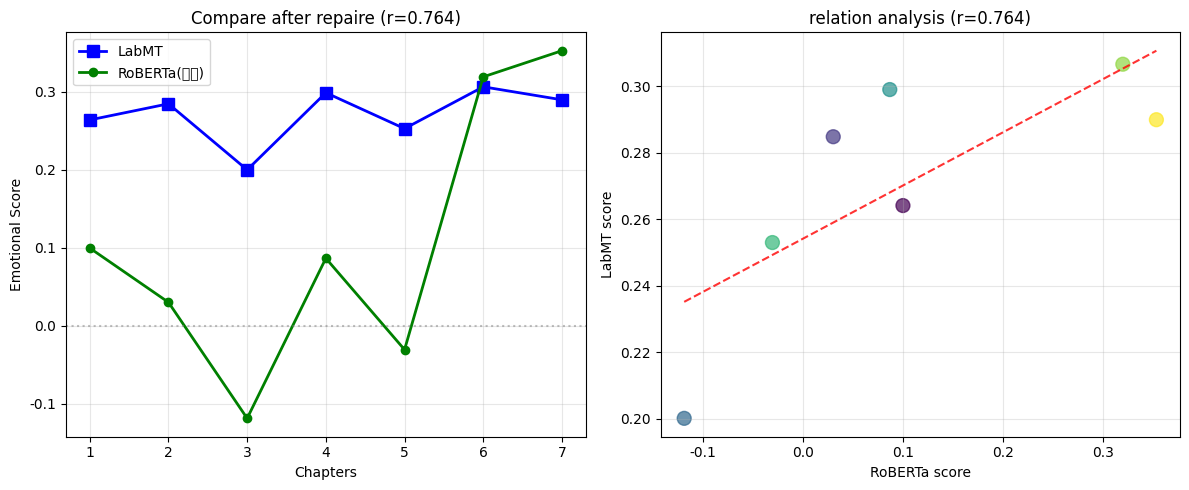


🎯 最终结论:
LabMT vs RoBERTa相关性: 0.764
推荐方法组合: LabMT(主) + RoBERTa(验证)


In [9]:
def analyze_with_roberta_correct(classifier, text):
    """正确的RoBERTa分析函数"""
    try:
        if len(text) <= 500:
            result = classifier(text)[0]
            return convert_roberta_score(result)
        else:
            # 分句分析（修复版）
            sentences = [s.strip() for s in text.split('.') if s.strip() and len(s.strip()) > 10]
            scores = []
            
            for sentence in sentences[:15]:  # 分析前15句
                try:
                    result = classifier(sentence)[0]
                    score = convert_roberta_score(result)
                    scores.append(score)
                except:
                    continue
            
            return sum(scores) / len(scores) if scores else 0.0
            
    except Exception as e:
        print(f"分析错误: {e}")
        return 0.0

def convert_roberta_score(result):
    """正确转换RoBERTa分数"""
    label = result['label'].lower()
    score = result['score']
    
    if label == 'positive':
        return score  # 0到1的正值
    elif label == 'negative':
        return -score  # 0到-1的负值
    elif label == 'neutral':
        return 0.0  # 中性为0
    else:
        print(f"未知标签: {label}")
        return 0.0

# 重新分析所有章节
print("🛠️ 修复后的RoBERTa分析:")
print("="*60)

corrected_roberta_scores = []
for i, chapter in enumerate(chapters):
    labmt_score = labmt_details[i]['labmt_score']
    roberta_score = analyze_with_roberta_correct(modern_classifier, chapter['content'])
    
    corrected_roberta_scores.append(roberta_score)
    
    print(f"第{i+1}章: {chapter['title'][:30]}")
    print(f"  LabMT: {labmt_score:.3f}")
    print(f"  RoBERTa(修复): {roberta_score:.3f}")
    print()

# 计算修复后的相关性
from scipy.stats import pearsonr

corr_fixed, _ = pearsonr(corrected_roberta_scores, [d['labmt_score'] for d in labmt_details])
print(f"📊 修复后相关性: LabMT vs RoBERTa = {corr_fixed:.3f}")

# 对比可视化
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
chapters_num = range(1, len(chapters) + 1)
plt.plot(chapters_num, [d['labmt_score'] for d in labmt_details], 
         'b-s', label='LabMT', linewidth=2, markersize=8)
plt.plot(chapters_num, corrected_roberta_scores, 
         'g-o', label='RoBERTa(修复)', linewidth=2, markersize=6)
plt.title(f'Compare after repaire (r={corr_fixed:.3f})')
plt.xlabel('Chapters')
plt.ylabel('Emotional Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='gray', linestyle=':', alpha=0.5)

plt.subplot(1, 2, 2)
plt.scatter(corrected_roberta_scores, [d['labmt_score'] for d in labmt_details], 
           c=chapters_num, cmap='viridis', s=100, alpha=0.7)
plt.xlabel('RoBERTa score')
plt.ylabel('LabMT score')
plt.title(f'relation analysis (r={corr_fixed:.3f})')
plt.grid(True, alpha=0.3)

# 添加回归线
import numpy as np
z = np.polyfit(corrected_roberta_scores, [d['labmt_score'] for d in labmt_details], 1)
p = np.poly1d(z)
x_line = np.linspace(min(corrected_roberta_scores), max(corrected_roberta_scores), 100)
plt.plot(x_line, p(x_line), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

print(f"\n🎯 最终结论:")
print(f"LabMT vs RoBERTa相关性: {corr_fixed:.3f}")
print(f"推荐方法组合: LabMT(主) + RoBERTa(验证)")

In [27]:
# 诊断和修复CSV读取问题

import pandas as pd
import os

def diagnose_csv_file(file_path='/Users/haha/Story/data/Hedonometer.csv'):
    """诊断CSV文件结构"""
    print(f"🔍 诊断CSV文件: {file_path}")
    
    if not os.path.exists(file_path):
        print(f"❌ 文件不存在: {file_path}")
        return None
    
    try:
        # 方法1: 查看原始文件前几行
        print("\n📋 文件前5行原始内容:")
        with open(file_path, 'r', encoding='utf-8') as f:
            for i in range(5):
                line = f.readline().strip()
                print(f"  行{i+1}: {repr(line)}")
        
        # 方法2: 尝试不同的分隔符
        print("\n🔍 尝试不同的读取方式:")
        
        separators = [',', '\t', ';', '|']
        for sep in separators:
            try:
                df = pd.read_csv(file_path, sep=sep, nrows=3)
                print(f"\n✅ 分隔符 '{sep}' 成功:")
                print(f"   形状: {df.shape}")
                print(f"   列名: {list(df.columns)}")
                print(f"   前3行:\n{df}")
                
                # 检查是否有合适的列
                word_cols = [col for col in df.columns if 'word' in str(col).lower()]
                happiness_cols = [col for col in df.columns if any(keyword in str(col).lower() 
                                for keyword in ['happiness', 'happs', 'valence', 'score'])]
                
                print(f"   词汇列候选: {word_cols}")
                print(f"   情感列候选: {happiness_cols}")
                
                if word_cols and happiness_cols:
                    print(f"   🎯 找到匹配的列！")
                    return sep, word_cols[0], happiness_cols[0]
                
            except Exception as e:
                print(f"❌ 分隔符 '{sep}' 失败: {e}")
        
        # 方法3: 手动检测分隔符
        print("\n🔍 手动检测分隔符:")
        with open(file_path, 'r', encoding='utf-8') as f:
            first_line = f.readline().strip()
            print(f"第一行: {repr(first_line)}")
            
            for sep in separators:
                parts = first_line.split(sep)
                print(f"用'{sep}'分割得到{len(parts)}部分: {parts[:5]}")
        
        return None
        
    except Exception as e:
        print(f"❌ 文件读取失败: {e}")
        return None

# 修复版的LabMT加载函数
def load_labmt_fixed(file_path='/Users/haha/Story/data/Hedonometer.csv'):
    """修复版LabMT加载"""
    print(f"🔧 修复版LabMT加载: {file_path}")
    
    # 先诊断文件
    result = diagnose_csv_file(file_path)
    
    if result:
        sep, word_col, happiness_col = result
        print(f"\n✅ 使用检测到的格式: 分隔符='{sep}', 词汇列='{word_col}', 情感列='{happiness_col}'")
    else:
        # 使用常见的默认值
        print("\n⚠️ 自动检测失败，使用常见格式尝试...")
        sep = '\t'  # Hedonometer通常是tab分隔
        word_col = None
        happiness_col = None
    
    try:
        # 加载完整数据
        df = pd.read_csv(file_path, sep=sep)
        print(f"📊 加载成功: {df.shape}")
        print(f"📋 所有列名: {list(df.columns)}")
        
        # 自动检测列名
        if not word_col:
            for col in df.columns:
                if 'word' in str(col).lower():
                    word_col = col
                    break
        
        if not happiness_col:
            for col in df.columns:
                col_lower = str(col).lower()
                if any(keyword in col_lower for keyword in ['happiness', 'happs', 'valence', 'score', 'average']):
                    happiness_col = col
                    break
        
        print(f"🎯 使用列: 词汇='{word_col}', 情感='{happiness_col}'")
        
        if not word_col or not happiness_col:
            print("❌ 未找到必要的列")
            print("📋 可用列名:", list(df.columns))
            
            # 手动指定列名（基于常见的Hedonometer格式）
            if len(df.columns) >= 2:
                word_col = df.columns[0]  # 第一列通常是词汇
                happiness_col = df.columns[1]  # 第二列通常是分数
                print(f"🔄 使用默认列: 词汇='{word_col}', 情感='{happiness_col}'")
        
        # 构建词典
        labmt_dict = {}
        valid_count = 0
        
        print(f"\n📊 构建LabMT词典...")
        print(f"示例数据:")
        for i, (_, row) in enumerate(df.head().iterrows()):
            print(f"  {row[word_col]} -> {row[happiness_col]}")
        
        for _, row in df.iterrows():
            try:
                word = str(row[word_col]).lower().strip()
                score = float(row[happiness_col])
                
                # 过滤无效词汇和中性词
                if len(word) > 1 and not (4.0 <= score <= 6.0):
                    labmt_dict[word] = score
                    valid_count += 1
            except:
                continue
        
        print(f"✅ LabMT词典构建成功!")
        print(f"📊 总词汇: {len(df)}")
        print(f"📊 有效词汇: {valid_count}")
        print(f"📊 示例词汇: {list(labmt_dict.items())[:5]}")
        
        return labmt_dict
        
    except Exception as e:
        print(f"❌ 加载失败: {e}")
        import traceback
        traceback.print_exc()
        return None

# 测试修复
print("🧪 测试CSV文件读取修复...")
labmt_dict = load_labmt_fixed()

if labmt_dict:
    print(f"\n🎉 修复成功! 词典包含 {len(labmt_dict)} 个词汇")
    
    # 测试几个常见词汇
    test_words = ['happy', 'sad', 'good', 'bad', 'love', 'hate', 'wonderful', 'terrible']
    print("\n🔍 测试常见词汇:")
    for word in test_words:
        if word in labmt_dict:
            print(f"  {word}: {labmt_dict[word]}")
        else:
            print(f"  {word}: 未找到")
else:
    print("\n❌ 修复失败，需要手动检查CSV文件格式")

🧪 测试CSV文件读取修复...
🔧 修复版LabMT加载: /Users/haha/Story/data/Hedonometer.csv
🔍 诊断CSV文件: /Users/haha/Story/data/Hedonometer.csv

📋 文件前5行原始内容:
  行1: '"Rank","Word","Word in English","Happiness Score","Standard Deviation of Ratings"'
  行2: '"0","laughter","laughter","8.5","0.93"'
  行3: '"1","happiness","happiness","8.44","0.97"'
  行4: '"2","love","love","8.42","1.11"'
  行5: '"3","happy","happy","8.3","0.99"'

🔍 尝试不同的读取方式:

✅ 分隔符 ',' 成功:
   形状: (3, 5)
   列名: ['Rank', 'Word', 'Word in English', 'Happiness Score', 'Standard Deviation of Ratings']
   前3行:
   Rank       Word Word in English  Happiness Score  \
0     0   laughter        laughter             8.50   
1     1  happiness       happiness             8.44   
2     2       love            love             8.42   

   Standard Deviation of Ratings  
0                           0.93  
1                           0.97  
2                           1.11  
   词汇列候选: ['Word', 'Word in English']
   情感列候选: ['Happiness Score']
   🎯 找到匹配的列！

✅ 使用检测到的格

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi
import seaborn as sns
from matplotlib.patches import Rectangle
import re
import os
import json

print("✅ 模块1: 导入完成")

✅ 模块1: 导入完成


In [2]:
# 加载刚才生成的result
import json
with open('/Users/haha/Story/output/roberta_labmt_analysis_20250813_132238.json', 'r', encoding='utf-8') as f:
    result = json.load(f)

# 加载故事内容
with open('/Users/haha/Story/data/output/小红帽_科幻_linear_T0.7_s1/enhance.md', 'r', encoding='utf-8') as f:
    story_content = f.read()

print("✅ 数据已加载，可以运行可视化了！")

✅ 数据已加载，可以运行可视化了！


In [3]:
def plot_reagan_radar_chart_standalone(result):
    """独立的Reagan六型雷达图生成"""
    print("🎯 开始生成Reagan雷达图...")
    
    try:
        # 提取分类数据
        primary_classification = result['primary_analysis']['reagan_classification']
        validation_classification = result['validation_analysis']['reagan_classification']
        
        # 六种类型
        categories = ['Rags to riches', 'Tragedy', 'Man in a hole', 
                     'Icarus', 'Cinderella', 'Oedipus']
        
        # 获取相似度数据
        primary_scores = [primary_classification['all_similarities'].get(cat, 0) for cat in categories]
        validation_scores = [validation_classification['all_similarities'].get(cat, 0) for cat in categories]
        
        print(f"Primary scores: {primary_scores}")
        print(f"Validation scores: {validation_scores}")
        
        # 设置雷达图
        N = len(categories)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]  # 闭合
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(projection='polar'))
        
        # 子图1: RoBERTa (主要方法)
        primary_scores_plot = primary_scores + [primary_scores[0]]
        ax1.plot(angles, primary_scores_plot, 'o-', linewidth=2, label='RoBERTa', color='green')
        ax1.fill(angles, primary_scores_plot, alpha=0.25, color='green')
        ax1.set_xticks(angles[:-1])
        ax1.set_xticklabels(categories, fontsize=10)
        ax1.set_ylim(0, 1)
        ax1.set_title(f'RoBERTa Analysis\nBest Match: {primary_classification["best_match"]}\n'
                     f'Confidence: {primary_classification["confidence"]:.3f}', 
                     size=12, fontweight='bold', y=1.08)
        ax1.grid(True)
        
        # 子图2: LabMT (验证方法)  
        validation_scores_plot = validation_scores + [validation_scores[0]]
        ax2.plot(angles, validation_scores_plot, 's-', linewidth=2, label='LabMT', color='blue')
        ax2.fill(angles, validation_scores_plot, alpha=0.25, color='blue')
        ax2.set_xticks(angles[:-1])
        ax2.set_xticklabels(categories, fontsize=10)
        ax2.set_ylim(0, 1)
        ax2.set_title(f'LabMT Analysis\nBest Match: {validation_classification["best_match"]}\n'
                     f'Confidence: {validation_classification["confidence"]:.3f}', 
                     size=12, fontweight='bold', y=1.08)
        ax2.grid(True)
        
        plt.tight_layout()
        plt.suptitle('Reagan Six-Type Classification Radar Chart', fontsize=16, fontweight='bold', y=0.98)
        
        # 保存
        if not os.path.exists('./output'):
            os.makedirs('./output')
        plt.savefig('./output/reagan_radar_chart.png', dpi=300, bbox_inches='tight')
        print("✅ 雷达图已保存: ./output/reagan_radar_chart.png")
        plt.show()
        
        return primary_scores, validation_scores
        
    except Exception as e:
        print(f"❌ 雷达图生成失败: {e}")
        import traceback
        traceback.print_exc()
        return None, None

print("✅ 模块3: 雷达图函数已定义")

✅ 模块3: 雷达图函数已定义


In [4]:
def generate_fluctuation_metrics_table_standalone(result):
    """独立的波动指标表格生成"""
    print("📊 开始生成波动指标表格...")
    
    try:
        # 提取情感分数
        primary_scores = result['primary_analysis']['scores']
        validation_scores = result['validation_analysis']['scores']
        correlation = result['correlation_analysis']['pearson_correlation']['r']
        
        print(f"Primary scores: {primary_scores}")
        print(f"Validation scores: {validation_scores}")
        print(f"Correlation: {correlation}")
        
        # 计算波动指标
        def calculate_detailed_metrics(scores, method_name):
            scores_array = np.array(scores)
            
            # 基础统计
            mean_score = np.mean(scores_array)
            std_score = np.std(scores_array)
            score_range = np.max(scores_array) - np.min(scores_array)
            min_score = np.min(scores_array)
            max_score = np.max(scores_array)
            
            # 趋势分析
            overall_trend = scores[-1] - scores[0] if len(scores) > 1 else 0
            
            # 峰值分析
            peaks = []
            valleys = []
            for i in range(1, len(scores) - 1):
                if scores[i] > scores[i-1] and scores[i] > scores[i+1]:
                    peaks.append(i+1)  # 章节号
                elif scores[i] < scores[i-1] and scores[i] < scores[i+1]:
                    valleys.append(i+1)
            
            # 波动性分析
            if len(scores) > 1:
                changes = [abs(scores[i] - scores[i-1]) for i in range(1, len(scores))]
                volatility = np.mean(changes)
                max_change = max(changes)
                change_direction_changes = sum(1 for i in range(1, len(changes)) 
                                             if (changes[i] > 0) != (changes[i-1] > 0))
            else:
                volatility = 0
                max_change = 0
                change_direction_changes = 0
            
            # 情感区域分析
            positive_count = sum(1 for s in scores if s > 0.1)
            negative_count = sum(1 for s in scores if s < -0.1)
            neutral_count = len(scores) - positive_count - negative_count
            
            return {
                'Method': method_name,
                'Mean': round(mean_score, 4),
                'Std Dev': round(std_score, 4),
                'Range': round(score_range, 4),
                'Min': round(min_score, 4),
                'Max': round(max_score, 4),
                'Overall Trend': round(overall_trend, 4),
                'Peak Count': len(peaks),
                'Valley Count': len(valleys),
                'Peak Positions': peaks,
                'Valley Positions': valleys,
                'Volatility': round(volatility, 4),
                'Max Single Change': round(max_change, 4),
                'Direction Changes': change_direction_changes,
                'Positive Chapters': positive_count,
                'Negative Chapters': negative_count,
                'Neutral Chapters': neutral_count
            }
        
        # 计算两种方法的指标
        primary_metrics = calculate_detailed_metrics(primary_scores, 'RoBERTa (Primary)')
        validation_metrics = calculate_detailed_metrics(validation_scores, 'LabMT (Validation)')
        
        # 创建对比表格
        metrics_df = pd.DataFrame([primary_metrics, validation_metrics])
        
        # 添加相关性信息
        correlation_row = {
            'Method': 'Method Correlation',
            'Mean': f'r = {correlation:.4f}',
            'Std Dev': result['correlation_analysis']['consistency_level'],
            'Range': f"p = {result['correlation_analysis']['pearson_correlation']['p_value']:.4f}",
            'Min': result['correlation_analysis']['pearson_correlation']['significance'],
            'Max': '-',
            'Overall Trend': '-',
            'Peak Count': '-',
            'Valley Count': '-', 
            'Peak Positions': '-',
            'Valley Positions': '-',
            'Volatility': '-',
            'Max Single Change': '-',
            'Direction Changes': '-',
            'Positive Chapters': '-',
            'Negative Chapters': '-',
            'Neutral Chapters': '-'
        }
        
        correlation_df = pd.DataFrame([correlation_row])
        final_df = pd.concat([metrics_df, correlation_df], ignore_index=True)
        
        print("📋 指标表格数据:")
        print(final_df)
        
        # 可视化表格
        fig, ax = plt.subplots(figsize=(20, 8))
        ax.axis('tight')
        ax.axis('off')
        
        # 创建表格
        table = ax.table(cellText=final_df.values,
                        colLabels=final_df.columns,
                        cellLoc='center',
                        loc='center',
                        bbox=[0, 0, 1, 1])
        
        # 设置表格样式
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 2)
        
        # 标题行样式
        for i in range(len(final_df.columns)):
            table[(0, i)].set_facecolor('#4CAF50')
            table[(0, i)].set_text_props(weight='bold', color='white')
        
        # 数据行样式  
        for i in range(1, len(final_df) + 1):
            for j in range(len(final_df.columns)):
                if i == 1:  # RoBERTa行
                    table[(i, j)].set_facecolor('#E8F5E8')
                elif i == 2:  # LabMT行
                    table[(i, j)].set_facecolor('#E3F2FD')
                else:  # 相关性行
                    table[(i, j)].set_facecolor('#FFF3E0')
        
        plt.title('Detailed Fluctuation Metrics Table', fontsize=16, fontweight='bold', pad=20)
        
        if not os.path.exists('./output'):
            os.makedirs('./output')
        plt.savefig('./output/fluctuation_metrics_table.png', dpi=300, bbox_inches='tight')
        print("✅ 指标表图已保存: ./output/fluctuation_metrics_table.png")
        plt.show()
        
        # 保存CSV
        final_df.to_csv('./output/fluctuation_metrics.csv', index=False)
        print("✅ 指标CSV已保存: ./output/fluctuation_metrics.csv")
        
        return final_df
        
    except Exception as e:
        print(f"❌ 指标表格生成失败: {e}")
        import traceback
        traceback.print_exc()
        return None

print("✅ 模块4: 波动指标函数已定义")

✅ 模块4: 波动指标函数已定义


In [5]:
def plot_basic_character_trajectories_standalone(story_content, result):
    """简化版角色情感轨迹图 - 不依赖外部分析器"""
    print("👥 开始生成基础角色轨迹图...")
    
    try:
        # 提取章节信息
        chapters = []
        chapter_pattern = r'# Chapter (\d+)[：:]([^\n]+)'
        splits = re.split(chapter_pattern, story_content)
        
        if len(splits) >= 3:
            for i in range(1, len(splits), 3):
                if i + 2 < len(splits):
                    chapter_num = int(splits[i])
                    title = splits[i + 1].strip()
                    content = splits[i + 2].strip()
                    chapters.append({
                        'num': chapter_num,
                        'title': title,
                        'content': content
                    })
        
        print(f"找到 {len(chapters)} 个章节")
        
        # 角色关键词定义
        characters = {
            'Little Red Riding Hood': ['Little Red', 'Red Riding Hood', 'she', 'her'],
            'Grandmother': ['grandmother', 'grandma', 'Grandmother'],
            'Mechanical Wolf': ['mechanical wolf', 'wolf', 'silver shadow', 'robotic wolf'],
            'Dr. Lin': ['Dr. Lin', 'Dr Lin', 'doctor'],
            'Technology': ['AI', 'artificial intelligence', 'system', 'technology', 'spacecraft']
        }
        
        # 简单的情感词计数方法
        positive_words = ['good', 'happy', 'safe', 'success', 'hope', 'relief', 'joy', 'warm', 'bright', 'beautiful']
        negative_words = ['danger', 'fear', 'threat', 'scary', 'dark', 'worry', 'attack', 'mechanical', 'cold', 'shadow']
        
        def simple_sentiment_score(text):
            """简单的情感评分 - 基于关键词计数"""
            text_lower = text.lower()
            pos_count = sum(1 for word in positive_words if word in text_lower)
            neg_count = sum(1 for word in negative_words if word in text_lower)
            
            if pos_count + neg_count == 0:
                return 0
            return (pos_count - neg_count) / (pos_count + neg_count)
        
        # 为每个角色计算情感轨迹
        character_trajectories = {}
        
        for char_name, keywords in characters.items():
            char_scores = []
            
            for chapter in chapters:
                # 提取包含该角色的句子
                sentences = chapter['content'].split('.')
                char_sentences = []
                
                for sentence in sentences:
                    sentence = sentence.strip()
                    if any(keyword.lower() in sentence.lower() for keyword in keywords):
                        char_sentences.append(sentence)
                
                # 计算该角色在此章节的情感分数
                if char_sentences:
                    char_text = '. '.join(char_sentences)
                    char_score = simple_sentiment_score(char_text)
                    char_scores.append(char_score)
                else:
                    char_scores.append(None)  # 角色未出现
            
            character_trajectories[char_name] = char_scores
        
        # 绘制角色情感轨迹
        fig, ax = plt.subplots(figsize=(14, 8))
        
        # 整体故事情感
        chapter_nums = range(1, len(chapters) + 1)
        story_scores = result['primary_analysis']['scores']
        
        # 绘制整体故事情感
        ax.plot(chapter_nums, story_scores, 'k-', linewidth=4, 
                label='Overall Story (RoBERTa)', alpha=0.7, marker='o', markersize=8)
        
        # 绘制角色轨迹
        colors = ['red', 'blue', 'orange', 'green', 'purple']
        markers = ['s', '^', 'D', 'v', '<']
        
        for i, (char_name, scores) in enumerate(character_trajectories.items()):
            # 过滤None值
            valid_chapters = []
            valid_scores = []
            for j, score in enumerate(scores):
                if score is not None:
                    valid_chapters.append(j + 1)
                    valid_scores.append(score)
            
            if valid_scores:  # 只绘制有数据的角色
                ax.plot(valid_chapters, valid_scores, 
                        color=colors[i % len(colors)], 
                        marker=markers[i % len(markers)],
                        linewidth=2, markersize=6, alpha=0.8,
                        label=f'{char_name} ({len(valid_scores)} chapters)')
        
        ax.set_title('Character Emotion Trajectories vs Overall Story Arc', 
                     fontsize=14, fontweight='bold')
        ax.set_xlabel('Chapter')
        ax.set_ylabel('Emotion Score')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='gray', linestyle=':', alpha=0.5)
        
        plt.tight_layout()
        
        if not os.path.exists('./output'):
            os.makedirs('./output')
        plt.savefig('./output/character_emotion_trajectories.png', dpi=300, bbox_inches='tight')
        print("✅ 角色轨迹图已保存: ./output/character_emotion_trajectories.png")
        plt.show()
        
        return character_trajectories
        
    except Exception as e:
        print(f"❌ 角色轨迹图生成失败: {e}")
        import traceback
        traceback.print_exc()
        return None

print("✅ 模块5: 角色轨迹函数已定义")


✅ 模块5: 角色轨迹函数已定义


In [6]:
print("\n" + "="*60)
print("🎯 模块化代码准备完成！")
print("="*60)
print("现在你可以逐个运行:")
print()
print("# 运行雷达图:")
print("radar_result = plot_reagan_radar_chart_standalone(result)")
print()
print("# 运行波动指标表:")  
print("metrics_result = generate_fluctuation_metrics_table_standalone(result)")
print()
print("# 运行角色轨迹图:")
print("char_result = plot_basic_character_trajectories_standalone(story_content, result)")
print()
print("⚠️  请确保你先有了 result 和 story_content 变量！")


🎯 模块化代码准备完成！
现在你可以逐个运行:

# 运行雷达图:
radar_result = plot_reagan_radar_chart_standalone(result)

# 运行波动指标表:
metrics_result = generate_fluctuation_metrics_table_standalone(result)

# 运行角色轨迹图:
char_result = plot_basic_character_trajectories_standalone(story_content, result)

⚠️  请确保你先有了 result 和 story_content 变量！


🎯 开始生成Reagan雷达图...
Primary scores: [0.7596, 0, 0.5371, 0, 0, 0.6036]
Validation scores: [0.6973, 0.6304, 0.0488, 0, 0, 0.2239]
✅ 雷达图已保存: ./output/reagan_radar_chart.png


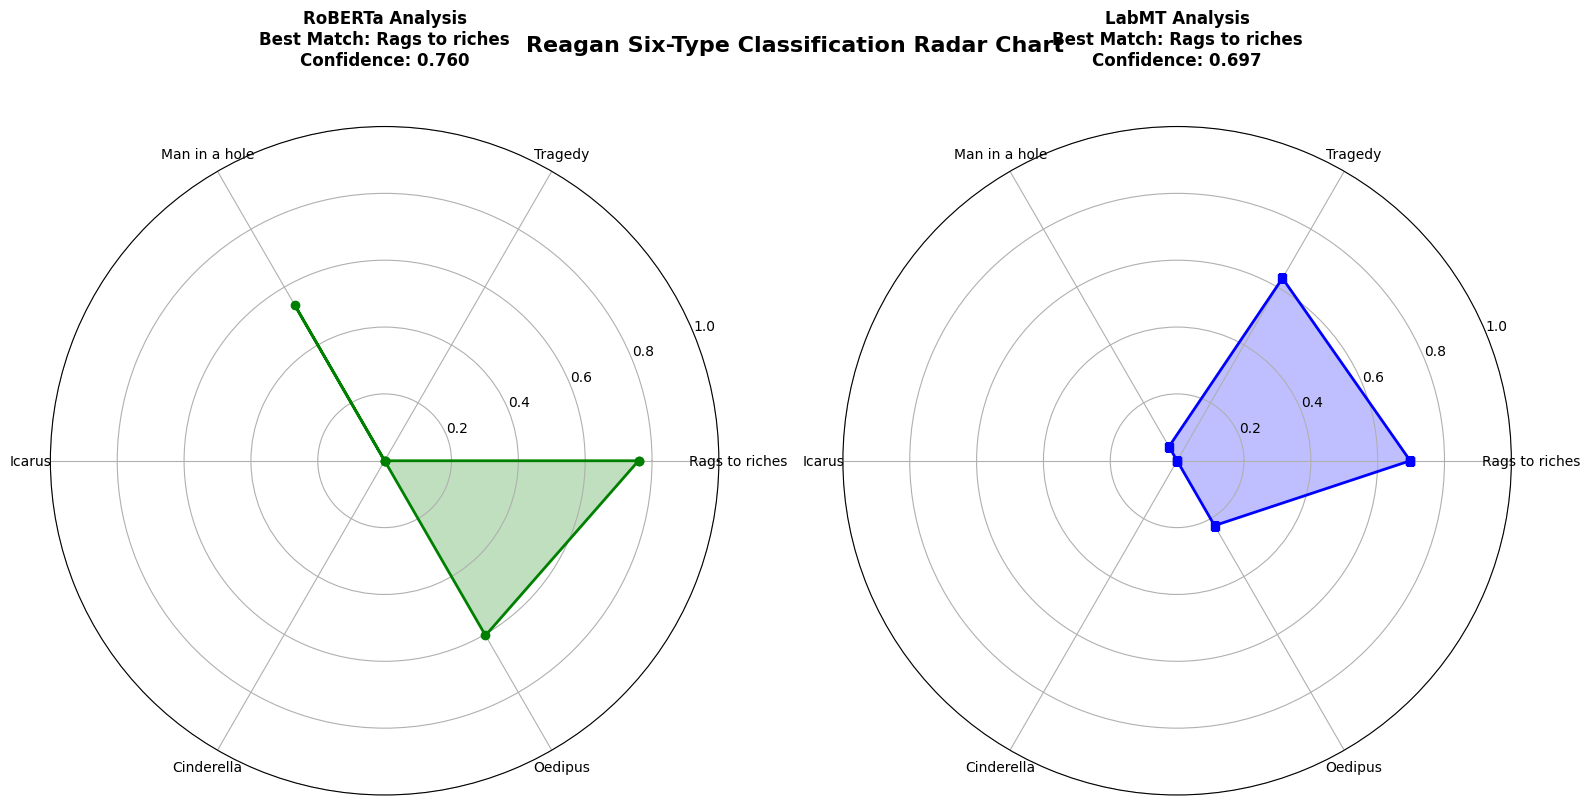

In [7]:
radar_result = plot_reagan_radar_chart_standalone(result)

📊 开始生成波动指标表格...
Primary scores: [0.09974308808644612, 0.030127910772959392, -0.11875303983688354, 0.08660483360290527, -0.03063515822092692, 0.31939326922098793, 0.35292007128397623]
Validation scores: [0.264103773584905, 0.28481117824773294, 0.2000909810126532, 0.29900291828793857, 0.2529763585038822, 0.3066261892839208, 0.2893154583583011]
Correlation: 0.7606
📋 指标表格数据:
               Method        Mean Std Dev       Range          Min     Max  \
0   RoBERTa (Primary)      0.1056  0.1612      0.4717      -0.1188  0.3529   
1  LabMT (Validation)       0.271  0.0338      0.1065       0.2001  0.3066   
2  Method Correlation  r = 0.7606    High  p = 0.0471  Significant       -   

  Overall Trend Peak Count Valley Count Peak Positions Valley Positions  \
0        0.2532          1            2            [4]           [3, 5]   
1        0.0252          3            2      [2, 4, 6]           [3, 5]   
2             -          -            -              -                -   

  Volatility

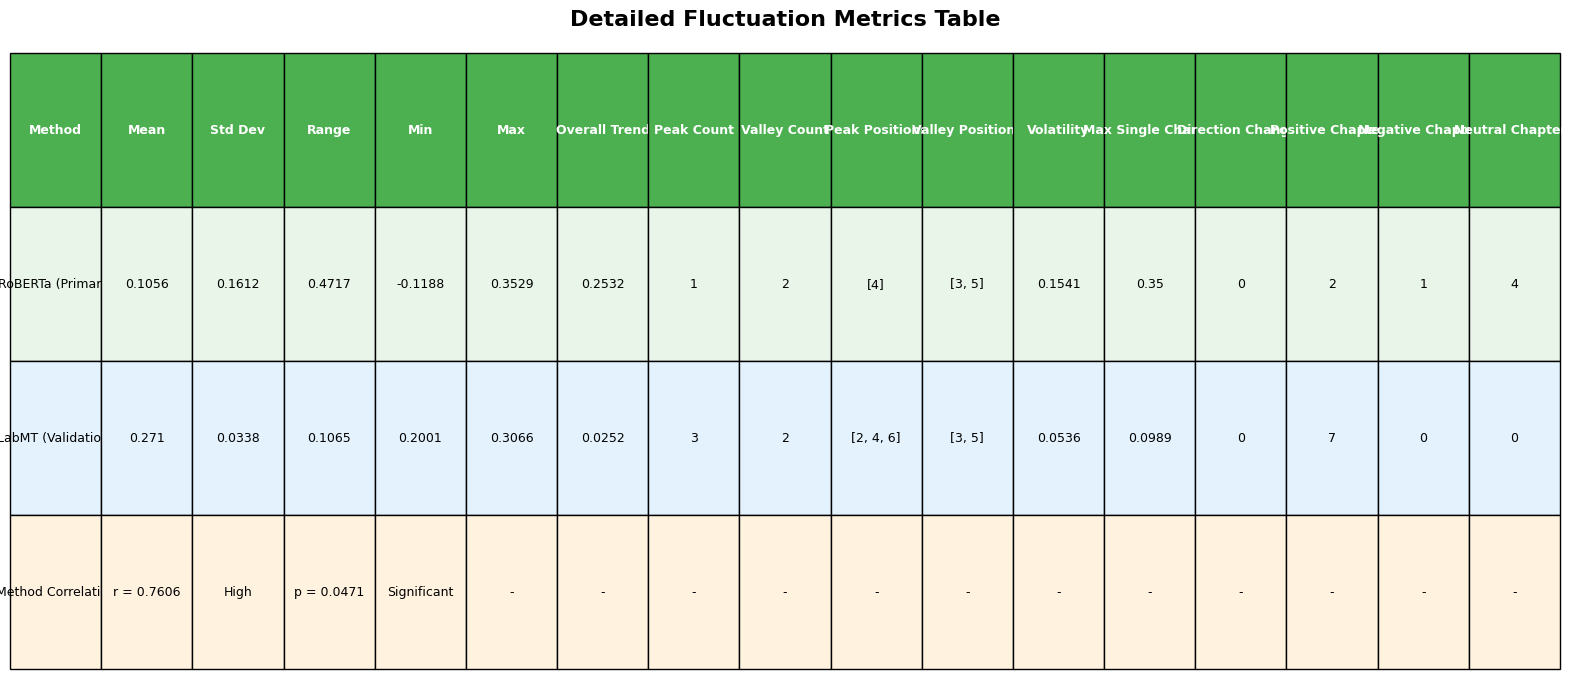

✅ 指标CSV已保存: ./output/fluctuation_metrics.csv


In [8]:
metrics_result = generate_fluctuation_metrics_table_standalone(result)

👥 开始生成基础角色轨迹图...
找到 7 个章节
✅ 角色轨迹图已保存: ./output/character_emotion_trajectories.png


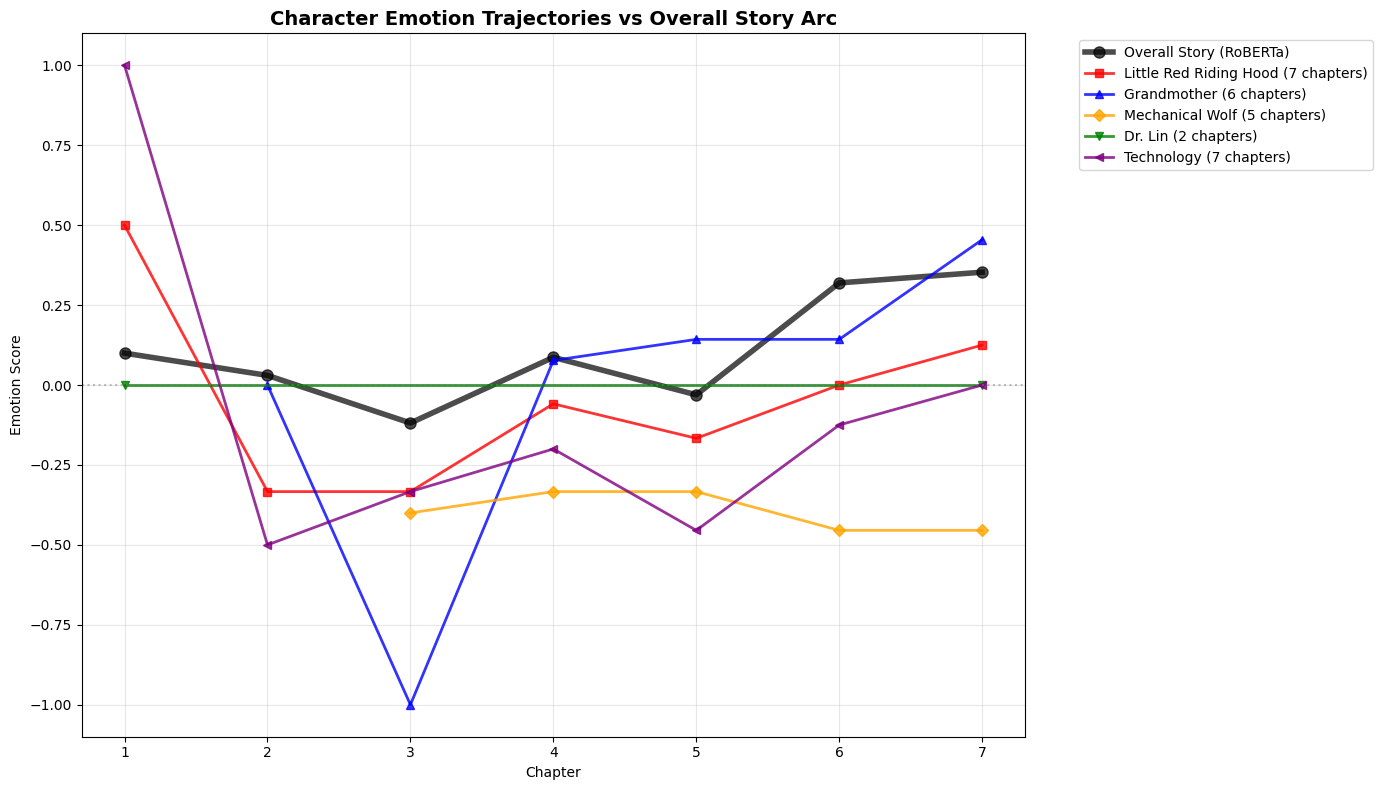

In [9]:
char_result = plot_basic_character_trajectories_standalone(story_content, result)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi
import seaborn as sns
from matplotlib.patches import Rectangle
import re

def complete_current_analysis_visualization(result, story_content):
    """
    基于现有分析结果，生成三个核心可视化：
    1. Reagan六型雷达图
    2. 详细波动指标表格  
    3. 角色情感轨迹图
    """
    
    # ==================== 1. Reagan六型雷达图 ====================
    def plot_reagan_radar_chart(result):
        """生成Reagan六型分类雷达图"""
        
        # 提取分类数据
        primary_classification = result['primary_analysis']['reagan_classification']
        validation_classification = result['validation_analysis']['reagan_classification']
        
        # 六种类型
        categories = ['Rags to riches', 'Tragedy', 'Man in a hole', 
                     'Icarus', 'Cinderella', 'Oedipus']
        
        # 获取相似度数据
        primary_scores = [primary_classification['all_similarities'].get(cat, 0) for cat in categories]
        validation_scores = [validation_classification['all_similarities'].get(cat, 0) for cat in categories]
        
        # 设置雷达图
        N = len(categories)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]  # 闭合
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(projection='polar'))
        
        # 子图1: RoBERTa (主要方法)
        primary_scores += primary_scores[:1]
        ax1.plot(angles, primary_scores, 'o-', linewidth=2, label='RoBERTa', color='green')
        ax1.fill(angles, primary_scores, alpha=0.25, color='green')
        ax1.set_xticks(angles[:-1])
        ax1.set_xticklabels(categories, fontsize=10)
        ax1.set_ylim(0, 1)
        ax1.set_title(f'RoBERTa Analysis\nBest Match: {primary_classification["best_match"]}\n'
                     f'Confidence: {primary_classification["confidence"]:.3f}', 
                     size=12, fontweight='bold', y=1.08)
        ax1.grid(True)
        
        # 子图2: LabMT (验证方法)  
        validation_scores += validation_scores[:1]
        ax2.plot(angles, validation_scores, 's-', linewidth=2, label='LabMT', color='blue')
        ax2.fill(angles, validation_scores, alpha=0.25, color='blue')
        ax2.set_xticks(angles[:-1])
        ax2.set_xticklabels(categories, fontsize=10)
        ax2.set_ylim(0, 1)
        ax2.set_title(f'LabMT Analysis\nBest Match: {validation_classification["best_match"]}\n'
                     f'Confidence: {validation_classification["confidence"]:.3f}', 
                     size=12, fontweight='bold', y=1.08)
        ax2.grid(True)
        
        plt.tight_layout()
        plt.suptitle('Reagan Six-Type Classification Radar Chart', fontsize=16, fontweight='bold', y=0.98)
        
        # 保存
        plt.savefig('User/haha/output/reagan_radar_chart.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return primary_scores[:-1], validation_scores[:-1]

    # ==================== 2. 详细波动指标表格 ====================
    def generate_fluctuation_metrics_table(result):
        """生成详细的情感波动指标表格"""
        
        # 提取情感分数
        primary_scores = result['primary_analysis']['scores']
        validation_scores = result['validation_analysis']['scores']
        correlation = result['correlation_analysis']['pearson_correlation']['r']
        
        # 计算波动指标
        def calculate_detailed_metrics(scores, method_name):
            scores_array = np.array(scores)
            
            # 基础统计
            mean_score = np.mean(scores_array)
            std_score = np.std(scores_array)
            score_range = np.max(scores_array) - np.min(scores_array)
            min_score = np.min(scores_array)
            max_score = np.max(scores_array)
            
            # 趋势分析
            overall_trend = scores[-1] - scores[0] if len(scores) > 1 else 0
            
            # 峰值分析
            peaks = []
            valleys = []
            for i in range(1, len(scores) - 1):
                if scores[i] > scores[i-1] and scores[i] > scores[i+1]:
                    peaks.append(i+1)  # 章节号
                elif scores[i] < scores[i-1] and scores[i] < scores[i+1]:
                    valleys.append(i+1)
            
            # 波动性分析
            if len(scores) > 1:
                changes = [abs(scores[i] - scores[i-1]) for i in range(1, len(scores))]
                volatility = np.mean(changes)
                max_change = max(changes)
                change_direction_changes = sum(1 for i in range(1, len(changes)) 
                                             if (changes[i] > 0) != (changes[i-1] > 0))
            else:
                volatility = 0
                max_change = 0
                change_direction_changes = 0
            
            # 情感区域分析
            positive_count = sum(1 for s in scores if s > 0.1)
            negative_count = sum(1 for s in scores if s < -0.1)
            neutral_count = len(scores) - positive_count - negative_count
            
            return {
                'Method': method_name,
                'Mean': round(mean_score, 4),
                'Std Dev': round(std_score, 4),
                'Range': round(score_range, 4),
                'Min': round(min_score, 4),
                'Max': round(max_score, 4),
                'Overall Trend': round(overall_trend, 4),
                'Peak Count': len(peaks),
                'Valley Count': len(valleys),
                'Peak Positions': peaks,
                'Valley Positions': valleys,
                'Volatility': round(volatility, 4),
                'Max Single Change': round(max_change, 4),
                'Direction Changes': change_direction_changes,
                'Positive Chapters': positive_count,
                'Negative Chapters': negative_count,
                'Neutral Chapters': neutral_count
            }
        
        # 计算两种方法的指标
        primary_metrics = calculate_detailed_metrics(primary_scores, 'RoBERTa (Primary)')
        validation_metrics = calculate_detailed_metrics(validation_scores, 'LabMT (Validation)')
        
        # 创建对比表格
        metrics_df = pd.DataFrame([primary_metrics, validation_metrics])
        
        # 添加相关性信息
        correlation_row = {
            'Method': 'Method Correlation',
            'Mean': f'r = {correlation:.4f}',
            'Std Dev': result['correlation_analysis']['consistency_level'],
            'Range': f"p = {result['correlation_analysis']['pearson_correlation']['p_value']:.4f}",
            'Min': result['correlation_analysis']['pearson_correlation']['significance'],
            'Max': '-',
            'Overall Trend': '-',
            'Peak Count': '-',
            'Valley Count': '-', 
            'Peak Positions': '-',
            'Valley Positions': '-',
            'Volatility': '-',
            'Max Single Change': '-',
            'Direction Changes': '-',
            'Positive Chapters': '-',
            'Negative Chapters': '-',
            'Neutral Chapters': '-'
        }
        
        correlation_df = pd.DataFrame([correlation_row])
        final_df = pd.concat([metrics_df, correlation_df], ignore_index=True)
        
        # 可视化表格
        fig, ax = plt.subplots(figsize=(20, 8))
        ax.axis('tight')
        ax.axis('off')
        
        # 创建表格
        table = ax.table(cellText=final_df.values,
                        colLabels=final_df.columns,
                        cellLoc='center',
                        loc='center',
                        bbox=[0, 0, 1, 1])
        
        # 设置表格样式
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 2)
        
        # 标题行样式
        for i in range(len(final_df.columns)):
            table[(0, i)].set_facecolor('#4CAF50')
            table[(0, i)].set_text_props(weight='bold', color='white')
        
        # 数据行样式  
        for i in range(1, len(final_df) + 1):
            for j in range(len(final_df.columns)):
                if i == 1:  # RoBERTa行
                    table[(i, j)].set_facecolor('#E8F5E8')
                elif i == 2:  # LabMT行
                    table[(i, j)].set_facecolor('#E3F2FD')
                else:  # 相关性行
                    table[(i, j)].set_facecolor('#FFF3E0')
        
        plt.title('Detailed Fluctuation Metrics Table', fontsize=16, fontweight='bold', pad=20)
        plt.savefig('User/haha/Story/output/fluctuation_metrics_table.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 保存CSV
        final_df.to_csv('User/haha/Story/output/fluctuation_metrics.csv', index=False)
        print("✅ 波动指标表格已保存: User/haha/Story/output/fluctuation_metrics.csv")
        
        return final_df

    # ==================== 3. 角色情感轨迹图 ====================
    def plot_character_emotion_trajectories(story_content, result):
        """生成角色情感轨迹图"""
        
        # 提取章节信息
        chapters = []
        chapter_pattern = r'# Chapter (\d+)[：:]([^\n]+)'
        splits = re.split(chapter_pattern, story_content)
        
        if len(splits) >= 3:
            for i in range(1, len(splits), 3):
                if i + 2 < len(splits):
                    chapter_num = int(splits[i])
                    title = splits[i + 1].strip()
                    content = splits[i + 2].strip()
                    chapters.append({
                        'num': chapter_num,
                        'title': title,
                        'content': content
                    })
        
        # 初始化情感分析器(使用现有的)
        from src.analysis.emotional_arc_analyzer import DualMethodEmotionalAnalyzer
        analyzer = DualMethodEmotionalAnalyzer()
        
        # 角色关键词定义
        characters = {
            'Little Red Riding Hood': ['Little Red', 'Red Riding Hood', 'Little Red Riding', 'she', 'her'],
            'Grandmother': ['grandmother', 'grandma', 'Grandmother'],
            'Mechanical Wolf': ['mechanical wolf', 'wolf', 'silver shadow', 'robotic wolf'],
            'Dr. Lin': ['Dr. Lin', 'Dr Lin', 'doctor'],
            'Xiao Bai': ['Xiao Bai', 'medical robot', 'robot'],
            'AI/Tech Elements': ['AI', 'artificial intelligence', 'system', 'technology', 'spacecraft']
        }
        
        # 为每个角色计算情感轨迹
        character_trajectories = {}
        
        for char_name, keywords in characters.items():
            char_scores = []
            
            for chapter in chapters:
                # 提取包含该角色的句子
                sentences = chapter['content'].split('.')
                char_sentences = []
                
                for sentence in sentences:
                    sentence = sentence.strip()
                    if any(keyword.lower() in sentence.lower() for keyword in keywords):
                        char_sentences.append(sentence)
                
                # 计算该角色在此章节的情感分数
                if char_sentences:
                    char_text = '. '.join(char_sentences)
                    # 使用RoBERTa分析
                    char_score = analyzer.analyze_vader(char_text)  # 这里可以替换为RoBERTa
                    char_scores.append(char_score)
                else:
                    char_scores.append(None)  # 角色未出现
            
            character_trajectories[char_name] = char_scores
        
        # 绘制角色情感轨迹
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
        
        # 子图1: 所有角色轨迹 + 整体故事情感
        chapter_nums = range(1, len(chapters) + 1)
        story_scores = result['primary_analysis']['scores']
        
        # 绘制整体故事情感
        ax1.plot(chapter_nums, story_scores, 'k-', linewidth=4, 
                label='Overall Story (RoBERTa)', alpha=0.7, marker='o', markersize=8)
        
        # 绘制角色轨迹
        colors = ['red', 'blue', 'orange', 'green', 'purple', 'brown']
        markers = ['s', '^', 'D', 'v', '<', '>']
        
        for i, (char_name, scores) in enumerate(character_trajectories.items()):
            # 过滤None值
            valid_chapters = []
            valid_scores = []
            for j, score in enumerate(scores):
                if score is not None:
                    valid_chapters.append(j + 1)
                    valid_scores.append(score)
            
            if valid_scores:  # 只绘制有数据的角色
                ax1.plot(valid_chapters, valid_scores, 
                        color=colors[i % len(colors)], 
                        marker=markers[i % len(markers)],
                        linewidth=2, markersize=6, alpha=0.8,
                        label=f'{char_name} ({len(valid_scores)} chapters)')
        
        ax1.set_title('Character Emotion Trajectories vs Overall Story Arc', 
                     fontsize=14, fontweight='bold')
        ax1.set_xlabel('Chapter')
        ax1.set_ylabel('Emotion Score')
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(True, alpha=0.3)
        ax1.axhline(y=0, color='gray', linestyle=':', alpha=0.5)
        
        # 子图2: 角色情感一致性分析
        consistency_data = []
        
        for char_name, char_scores in character_trajectories.items():
            # 计算与整体故事的相关性
            valid_pairs = [(story_scores[i], char_scores[i]) 
                          for i in range(len(char_scores)) 
                          if char_scores[i] is not None]
            
            if len(valid_pairs) >= 3:  # 至少3个数据点才计算相关性
                story_vals = [pair[0] for pair in valid_pairs]
                char_vals = [pair[1] for pair in valid_pairs]
                correlation = np.corrcoef(story_vals, char_vals)[0, 1]
                
                consistency_data.append({
                    'Character': char_name,
                    'Correlation': correlation,
                    'Appearance Count': len(valid_pairs)
                })
        
        # 绘制一致性条形图
        if consistency_data:
            consistency_df = pd.DataFrame(consistency_data)
            bars = ax2.bar(range(len(consistency_df)), consistency_df['Correlation'], 
                          color=[colors[i % len(colors)] for i in range(len(consistency_df))],
                          alpha=0.7)
            
            ax2.set_title('Character-Story Emotion Consistency', fontsize=14, fontweight='bold')
            ax2.set_xlabel('Characters')
            ax2.set_ylabel('Correlation with Overall Story')
            ax2.set_xticks(range(len(consistency_df)))
            ax2.set_xticklabels([f"{row['Character']}\n({row['Appearance Count']} ch.)" 
                               for _, row in consistency_df.iterrows()], 
                               rotation=45, ha='right')
            ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
            ax2.grid(True, alpha=0.3)
            
            # 添加数值标签
            for bar, corr in zip(bars, consistency_df['Correlation']):
                height = bar.get_height()
                ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05 if height >= 0 else height - 0.05,
                        f'{corr:.3f}', ha='center', va='bottom' if height >= 0 else 'top',
                        fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('User/haha/Story/output/character_emotion_trajectories.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return character_trajectories, consistency_data if 'consistency_data' in locals() else []

    # ==================== 执行所有可视化 ====================
    print("🎨 生成Reagan六型雷达图...")
    radar_scores = plot_reagan_radar_chart(result)
    
    print("📊 生成详细波动指标表格...")
    metrics_table = generate_fluctuation_metrics_table(result)
    
    print("👥 生成角色情感轨迹图...")
    char_trajectories, char_consistency = plot_character_emotion_trajectories(story_content, result)
    
    # 汇总结果
    visualization_summary = {
        'reagan_radar_scores': {
            'primary_method': radar_scores[0],
            'validation_method': radar_scores[1]
        },
        'fluctuation_metrics': metrics_table.to_dict(),
        'character_analysis': {
            'trajectories': char_trajectories,
            'consistency': char_consistency
        }
    }
    
    # 保存汇总结果
    import json
    with open('User/haha/Story/output/visualization_summary.json', 'w', encoding='utf-8') as f:
        json.dump(visualization_summary, f, ensure_ascii=False, indent=2, default=str)
    
    print("\n🎯 可视化完成！生成文件:")
    print("  📈 Reagan雷达图: User/haha/Story/output/reagan_radar_chart.png")
    print("  📊 波动指标表: User/haha/Story/output/fluctuation_metrics_table.png")
    print("  👥 角色轨迹图: User/haha/Story/output/character_emotion_trajectories.png")
    print("  📋 指标CSV: User/haha/Story/output/fluctuation_metrics.csv")
    print("  📄 汇总JSON: User/haha/Story/output/visualization_summary.json")
    
    return visualization_summary

# 使用方法:
# 1. 确保你已经有了result (之前的分析结果)
# 2. 读取故事内容
# with open('data/output/小红帽_科幻_linear_T0.7_s1/enhance.md', 'r', encoding='utf-8') as f:
#     story_content = f.read()
# 3. 运行可视化
# viz_result = complete_current_analysis_visualization(result, story_content)